Импорт библиотек

In [1]:
!pip install ultralytics matplotlib opencv-python

from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 18.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Загрузка изображений

In [2]:
import urllib.request

# Создадим папку для изображений
os.makedirs("images", exist_ok=True)

# Ссылки на изображения
image_urls = [
    "https://avatars.dzeninfra.ru/get-zen_doc/271828/pub_65dcbeb29e232128a245a623_65dcbecb5a38283b364fc8da/scale_1200",
    "https://sun9-48.userapi.com/impg/uuCMzaIN4r8LjE8TRJnpEhQBSqQjkSgwDLlb3g/KdyMGVfzSNw.jpg?size=1000x667&quality=95&sign=f703153f545c75424954f9a35fed7d4e&c_uniq_tag=hLQ-S-28_i1aaQNTECDvc-b2xGm_Y_HrExQX9k8lRKw&type=album",
    "https://naked-science.ru/wp-content/uploads/2020/04/232-scaled.jpg"
]

# Скачивание изображений
for i, url in enumerate(image_urls):
    urllib.request.urlretrieve(url, f"images/image_{i+1}.jpg")

print("Изображения успешно скачаны")


Изображения успешно скачаны


Загрузка модели YOLO и распознавание людей на изображениях

In [3]:
model = YOLO('yolov8n-pose.pt')  # Используем предварительно обученную модель

# Список изображений
image_paths = [f"images/{img}" for img in os.listdir("images")]

# Распознавание скелетов на всех изображениях
results = []
for image_path in image_paths:
    result = model(image_path)  # Выполняем распознавание
    results.append(result)

print("Распознавание завершено")


100%|██████████| 6.52M/6.52M [00:00<00:00, 116MB/s]



image 1/1 /content/images/image_1.jpg: 416x640 1 person, 98.9ms
Speed: 13.4ms preprocess, 98.9ms inference, 788.1ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/images/image_2.jpg: 448x640 12 persons, 41.6ms
Speed: 2.4ms preprocess, 41.6ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/images/image_3.jpg: 448x640 18 persons, 7.5ms
Speed: 2.3ms preprocess, 7.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Распознавание завершено


Отображение результатов распознавания

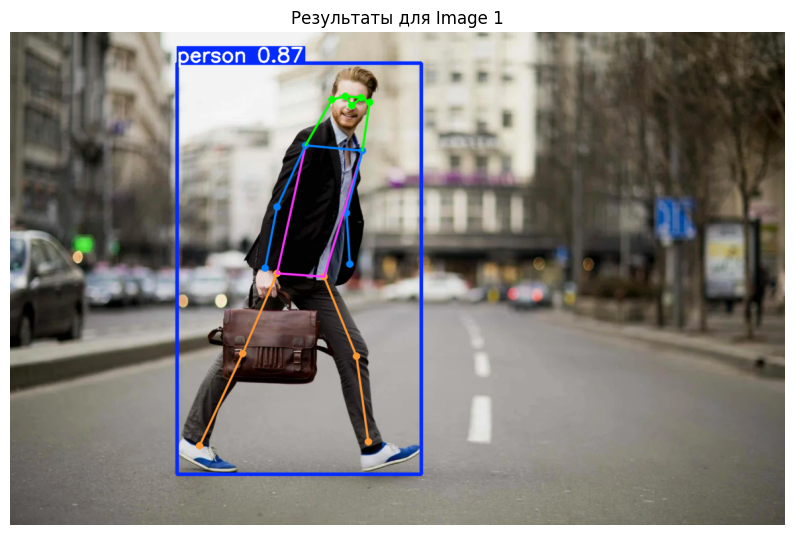

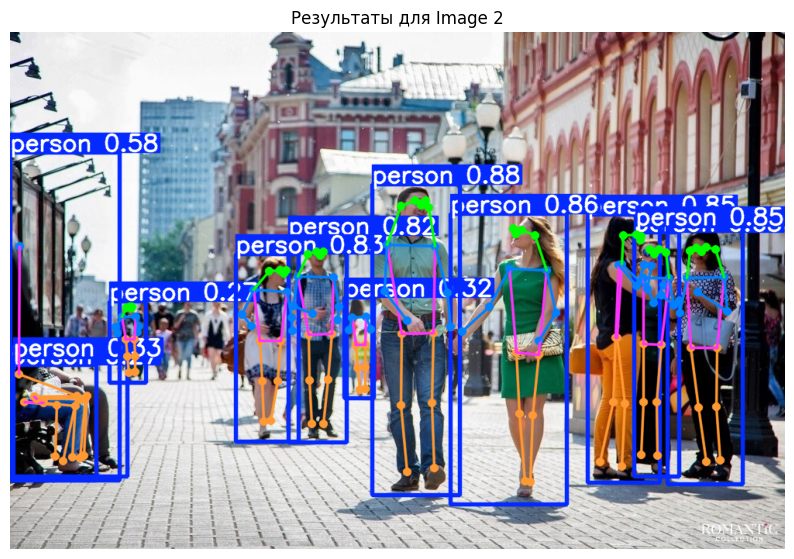

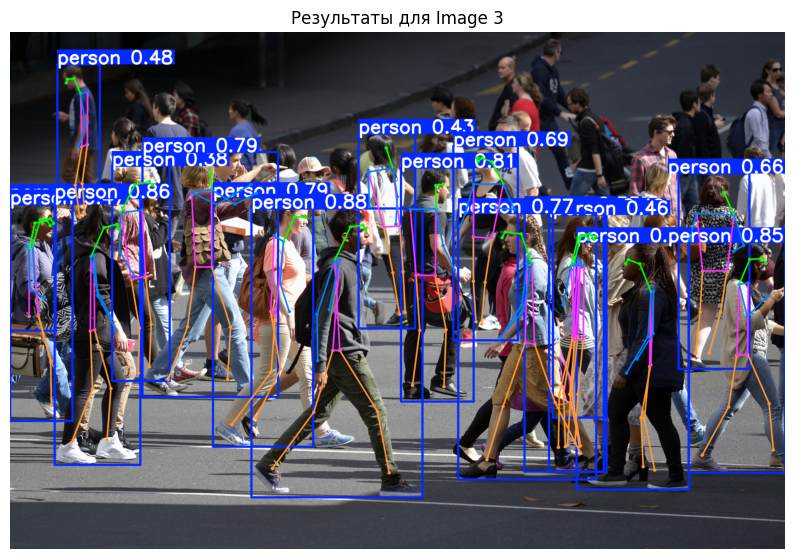

In [4]:
for i, result in enumerate(results):
    # Получение изображения с наложенными результатами
    annotated_image = result[0].plot()  # Рисуем скелеты

    # Отображение изображения
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Результаты для Image {i+1}")
    plt.axis("off")
    plt.show()
